# Siri Saladi 19A1HP045

In [1]:
import pandas as pd #calling pandas library to import the dataset
import numpy as np #Numpy library is called to perform mathematical computations 

In [2]:
adv_df=pd.read_csv(r"Advertising.csv") #Reading dataset named Advertising from working directory to pandas dataframe

In [3]:
adv_df.info() #To print summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Sno          200 non-null int64
TV           199 non-null float64
Radio        199 non-null float64
Newspaper    199 non-null float64
Day          197 non-null object
Sales        200 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


## Q1 From the output we can say that each variable has been read appropriately.

In [4]:
adv_df = adv_df.dropna()#To drop missing values from the dataset


In [5]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
Sno          197 non-null int64
TV           197 non-null float64
Radio        197 non-null float64
Newspaper    197 non-null float64
Day          197 non-null object
Sales        197 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


## Q2 Hence missing values have been dropped. 3 Rows have been deleted.

## Q3 Encoding Categorical Variables

In [6]:
adv_df['Day'].unique() #From info we understood Day is an object type variable. So encode it to numeric


array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [7]:
pd.get_dummies(adv_df['Day'])[0:5] #Assigned dummy variables for the categorical variable. And printing the first rows 


,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [8]:
categorical_features = ['Day'] #Assigned Day column to categorical features

In [9]:
X_features=adv_df.columns
X_features

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day', 'Sales'], dtype='object')

In [10]:
X_features=['TV','Radio','Newspaper','Day'] #Considering only significant independant variables

In [11]:
X_features

['TV', 'Radio', 'Newspaper', 'Day']

In [12]:
adv_df_encoded = pd.get_dummies(adv_df[X_features], columns = categorical_features) 
#Encoded the categorical variables in data frame

In [13]:
adv_df_encoded.columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

## Q4 Descriptive Summary of all numericals

In [14]:
adv_df.describe() 

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


## Q5 Visualizations

In [15]:
get_ipython().magic('matplotlib inline')
import seaborn as sn                     #For Visulizations we need to import seaborn and matplotlib libraries
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

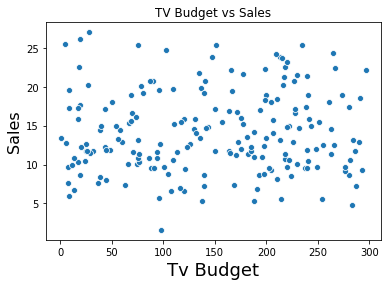

In [21]:
sn.scatterplot(x = 'TV', y = 'Sales', data = adv_df)

plt.title("TV Budget vs Sales")
plt.xlabel('Tv Budget', fontsize=18)
plt.ylabel('Sales', fontsize=16)


In [ ]:
#From the above scatter plot we can infer how sales are effected by variation in TV Budget. 


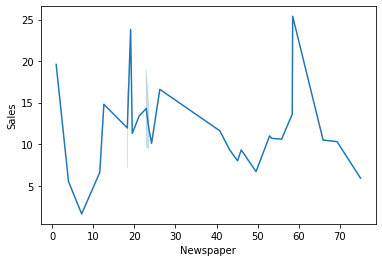

In [16]:
sn.lineplot(x = "Newspaper", y = "Sales", data = adv_df[1:30])
plt.show() 

In [47]:
#From the above plot we can see a random increase and decrease in sales irrespective of TV Budget. 
#This means there is someother attribute which is effecting sales

In [17]:
import warnings
warnings.filterwarnings('ignore')
#importing warnings to avoid warnings pop ups

## Q6 Split the Dataset as Train and Test in the ratio of 70:30

In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
X = sm.add_constant( adv_df_encoded )
Y = adv_df['Sales']
train_X, test_X, train_y, test_y = train_test_split( X, Y, train_size = 0.7, test_size = 0.3, random_state = 30 )
#Splitting the dataset into training and validation

## Q7 Checking the model fit

In [19]:
adv_df_model_1 = sm.OLS(train_y, train_X).fit()
adv_df_model_1.summary2()
#Fitting the model and obtaining the model summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.031  
Dependent Variable: Sales            AIC:                847.2545
Date:               2020-08-12 11:18 BIC:                864.7744
No. Observations:   137              Log-Likelihood:     -417.63 
Df Model:           5                F-statistic:        0.1867  
Df Residuals:       131              Prob (F-statistic): 0.967   
R-squared:          0.007            Scale:              27.212  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         11.0112    1.4774   7.4529  0.0000   8.0885  13.9340
TV            -0.0005    0.0078  -0.0628  0.9500  -0.0158   0.0149
Radio         -0.0114    0.0314  -0.3620  0.7179  -0.0735   0.0507
Newspaper     -0.0098    0.0237  -0.4134  0.6800  -0.0566   0.0371
Day_Holiday    2.9749    2.1219   1.4020  0.1633  -1.2227   7.1724
Day_Weekdays   3.5996    0.8673   4.1506  0.0001   1.8840   5.3153
Day_Weekend    4.4368    1.2614   3.5172  0.0006   1.9413   6.9322
-----------------------------------------------------------------
Omnibus:          4.082   Durbin-Watson:      1.968              
Prob(Omnibus):    0.130   Jarque-Bera (JB):   3.841              
Skew:             0.347   Prob(JB):           0.147              
Kurtosis:         2.563   Condition No.:      2609206712289491968
=================================================================
* The condition number is large (3e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

In [ ]:
#From the above model summary we can infer that the value of D-W test is close to 2. This implies absence of autocorrelation

## Check for Multicollinearity

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [21]:
vif_factors = get_vif_factors( X[adv_df_encoded.columns] )
vif_factors

,column,vif
0,TV,1.979924
1,Radio,1.155789
2,Newspaper,1.169096
3,Day_Holiday,1.441919
4,Day_Weekdays,5.846296
5,Day_Weekend,5.383447


In [22]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4]

In [23]:
print(columns_with_large_vif)

         column       vif
4  Day_Weekdays  5.846296
5   Day_Weekend  5.383447


In [24]:
columns_to_be_removed = ['Day_Weekdays']

In [25]:
X_new_features = list( set(adv_df_encoded) - set(columns_to_be_removed) ) 
#Columns with VIF greater than 4 are being removed to avoid multicollinearity

In [26]:
print(X_new_features)

['Radio', 'Day_Weekend', 'TV', 'Newspaper', 'Day_Holiday']


In [27]:
train_X = train_X[X_new_features]
adv_df_model_2 = sm.OLS(train_y, train_X).fit()
adv_df_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.750   
Dependent Variable:     Sales            AIC:                         946.5066
Date:                   2020-08-12 11:19 BIC:                         961.1065
No. Observations:       137              Log-Likelihood:              -468.25 
Df Model:               5                F-statistic:                 83.29   
Df Residuals:           132              Prob (F-statistic):          4.14e-39
R-squared (uncentered): 0.759            Scale:                       56.549  
---------------------------------------------------------------------------------
                   Coef.     Std.Err.       t       P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Radio              0.1442      0.0412     3.5026    0.0006      0.0628     0.2257
Day_Weekend       -5.7975      2.0715    -2.7987    0.0059     -9.8952    -1.6998
TV                 0.0579      0.0087     6.6615    0.0000      0.0407     0.0751
Newspaper          0.0578      0.0331     1.7437    0.0835     -0.0078     0.1234
Day_Holiday       -7.4459      4.0391    -1.8434    0.0675    -15.4357     0.5439
------------------------------------------------------------------------------
Omnibus:                   0.237            Durbin-Watson:               1.849
Prob(Omnibus):             0.888            Jarque-Bera (JB):            0.316
Skew:                      0.096            Prob(JB):                    0.854
Kurtosis:                  2.863            Condition No.:               1111 
==============================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

## Checking for Normality

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();

<Figure size 576x432 with 0 Axes>

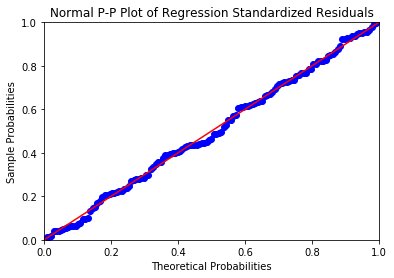

In [29]:
draw_pp_plot( adv_df_model_2, "Normal P-P Plot of Regression Standardized Residuals");


In [30]:
k = train_X.shape[1]
n = train_X.shape[0]

print( "Number of variables:", k, " and number of observations:", n)

Number of variables: 5  and number of observations: 137


In [31]:
k = train_X.shape[1]
n = train_X.shape[0]                       #Obtaining leverage values
print( "Number of variables:", k, " and number of observations:", n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Number of variables: 5  and number of observations: 137
Cutoff for leverage value:  0.131


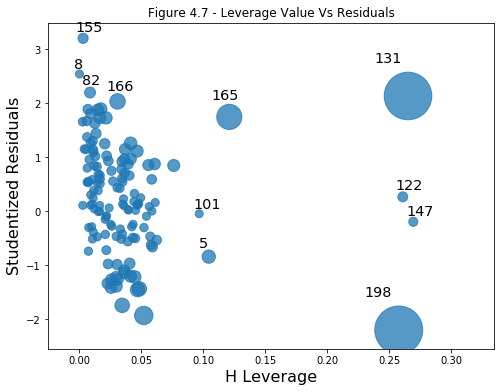

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( adv_df_model_2, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()

In [33]:
adv_df[adv_df.index.isin( [131, 198, 165] )]      #These are large residuals which influence the overall fit of regression

,Sno,TV,Radio,Newspaper,Day,Sales
131,132,265.2,2.9,43.0,Holiday,24.4
165,166,234.5,3.4,84.8,Weekend,25.4
198,199,283.6,42.0,66.2,Holiday,4.8


In [34]:
train_X_new = train_X.drop( [131, 165, 198], axis = 0)
train_y_new = train_y.drop( [131, 165, 198], axis = 0)        #Dropping larger residuals to enhance the model

In [35]:
import numpy as np
train_y = np.sqrt( train_y )

In [36]:
adv_df_model3 = sm.OLS(train_y, train_X).fit()
adv_df_model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.826   
Dependent Variable:     Sales            AIC:                         517.0435
Date:                   2020-08-12 11:19 BIC:                         531.6434
No. Observations:       137              Log-Likelihood:              -253.52 
Df Model:               5                F-statistic:                 131.2   
Df Residuals:           132              Prob (F-statistic):          1.98e-49
R-squared (uncentered): 0.832            Scale:                       2.4605  
---------------------------------------------------------------------------------
                    Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
---------------------------------------------------------------------------------
Radio               0.0388      0.0086     4.5117    0.0000     0.0218     0.0557
Day_Weekend        -1.5917      0.4321    -3.6836    0.0003    -2.4464    -0.7370
TV                  0.0150      0.0018     8.2516    0.0000     0.0114     0.0185
Newspaper           0.0159      0.0069     2.2967    0.0232     0.0022     0.0296
Day_Holiday        -1.9241      0.8425    -2.2837    0.0240    -3.5907    -0.2575
------------------------------------------------------------------------------
Omnibus:                  0.507             Durbin-Watson:               1.788
Prob(Omnibus):            0.776             Jarque-Bera (JB):            0.655
Skew:                     -0.097            Prob(JB):                    0.721
Kurtosis:                 2.722             Condition No.:               1111 
==============================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

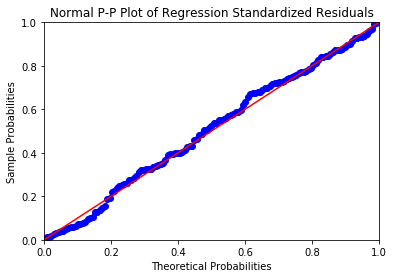

In [37]:
draw_pp_plot( adv_df_model3,"Normal P-P Plot of Regression Standardized Residuals");

In [38]:
pred_y = np.power(adv_df_model3.predict( test_X[train_X.columns] ), 2)

## Q8 RMSE

In [39]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

8.62755586624553

## Q9 MANUAL CALCULATION

In [1]:
#from the equation we need to calculate the value of dependent variable 
# Y=11.012+(-0.0005*232.1)+(-0.0114*8.6)+(-0.0098*8.7)+(4.4368) [data taken from last row.]
#Y= 15.1
#According to model 1 Y predicted is 15.10.0388(232.1)+(-1.59. Actual Y is 14.7
#According to model 2 Y= 11.012+(0.0388*8.6)+(-1.5917)+(0.015*232.1)+(0.0159*8.7) is 13.37